In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install imblearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv('/creditcard.csv')

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


There are only 0.17% fraudent transactions. So it's the imbalanced case. 

/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

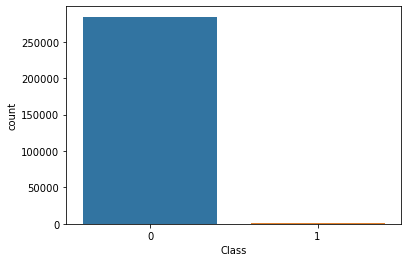

In [6]:
sns.countplot('Class',data=df)

#### Check for duplicated rows

In [7]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [8]:
df.drop_duplicates(inplace=True)

#### Correlation matrix

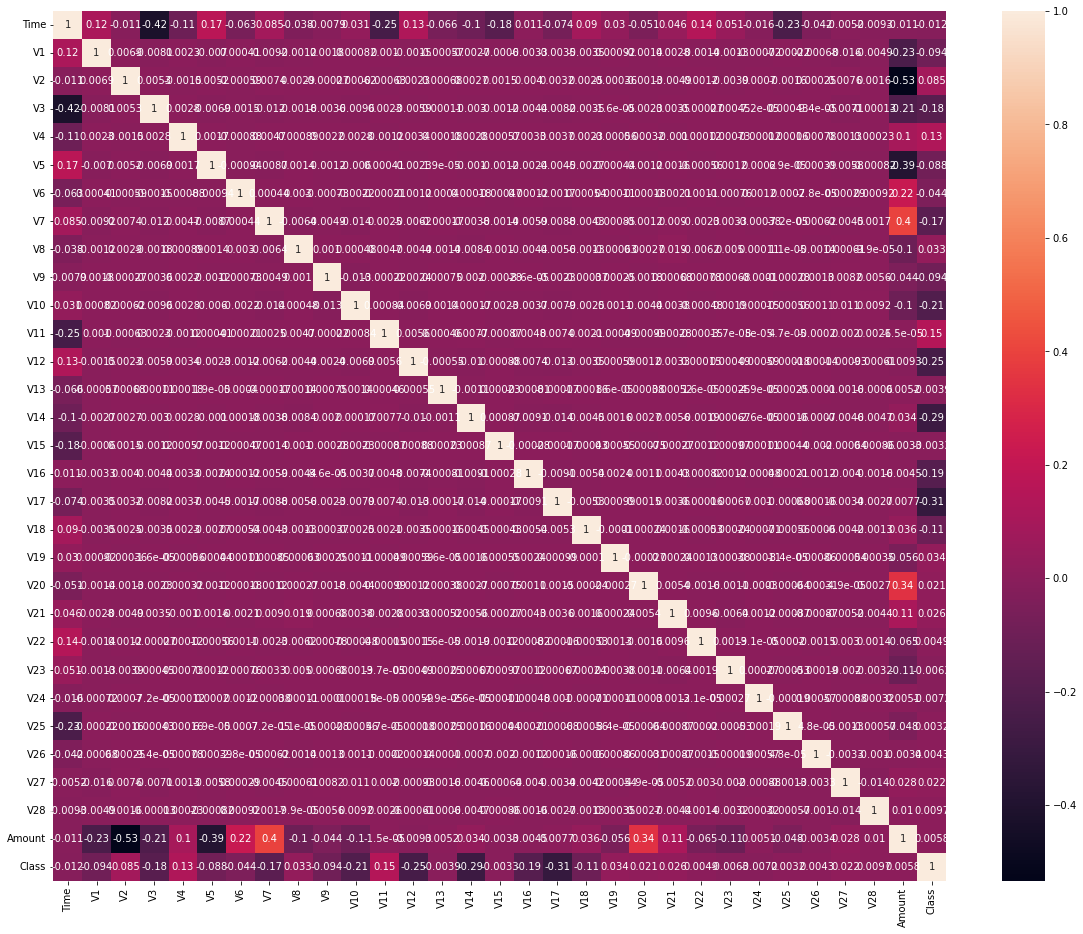

In [9]:
plt.figure(figsize=(20,16))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Data Preparation

#### Standardize time and amount

In [22]:
df_clean=df.copy()
scaler=StandardScaler()
df_clean[['Amount_scaler','Time_scaler']]=scaler.fit_transform(df_clean[['Amount','Time']])
df_clean.drop(['Time','Amount'],axis=1,inplace=True)

In [23]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaler,Time_scaler
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


#### Split into train and test

In [25]:
X=df_clean.drop('Class',axis=1)
y=df_clean['Class']

# split the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

#### Balancing data with Under-Sampling (RUS)

/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

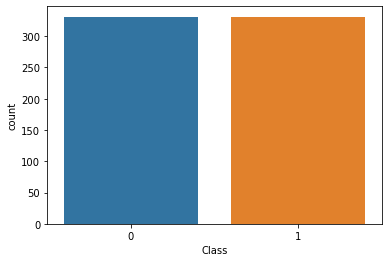

In [39]:
rus=RandomUnderSampler()
X_rus,y_rus=rus.fit_resample(X_train, y_train)
sns.countplot(y_rus)

#### Balancing data with Over-Sampling (SMOTE)

/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

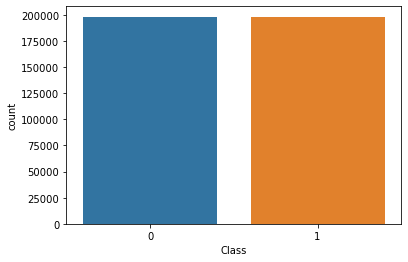

In [46]:
smo=SMOTE()
X_smo,y_smo=smo.fit_resample(X_train,y_train)
sns.countplot(y_smo)

#### Balancing Data with Over-Sampling

/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

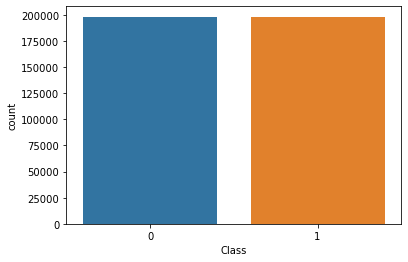

In [47]:
ovs=RandomOverSampler()
X_ovs,y_ovs=ovs.fit_resample(X_train, y_train)
sns.countplot(y_ovs)

### Logistic regression

#### Building model without balanced data

In [49]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     84976
           1     0.8641    0.6268    0.7265       142

    accuracy                         0.9992     85118
   macro avg     0.9317    0.8133    0.8631     85118
weighted avg     0.9992    0.9992    0.9992     85118



In [59]:
print(confusion_matrix(y_test,y_pred))

[[84962    14]
 [   53    89]]


In [57]:
print(roc_auc_score(y_test,y_pred))

0.813297905489802


#### building the RUS model

In [62]:
lg_rus=LogisticRegression()
lg_rus.fit(X_rus,y_rus)
y_pred_rus=lg_rus.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_rus,digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9698    0.9846     84976
           1     0.0490    0.9296    0.0930       142

    accuracy                         0.9698     85118
   macro avg     0.5244    0.9497    0.5388     85118
weighted avg     0.9983    0.9698    0.9831     85118



In [65]:
print(confusion_matrix(y_test,y_pred_rus))

[[82412  2564]
 [   10   132]]


In [67]:
print(roc_auc_score(y_test,y_pred_rus))

0.9497021197037242


1. The amount of false negatives has decreased considerably (from 53 to 10). This way, the bank’s losses will be lower.
2. There was also a big increase in false positives (from 14 to 2564), but this was already expected and is not the worst case scenario.
3. This model had an excellent AUC — 0.9497

#### building the SMOTE model

In [70]:
lg_smote=LogisticRegression()
lg_smote.fit(X_smo,y_smo)
y_pred_smote=lg_smote.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred_smote,digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9721    0.9858     84976
           1     0.0527    0.9296    0.0998       142

    accuracy                         0.9720     85118
   macro avg     0.5263    0.9508    0.5428     85118
weighted avg     0.9983    0.9720    0.9843     85118



In [72]:
print(confusion_matrix(y_test,y_pred_smote))

[[82604  2372]
 [   10   132]]


In [73]:
print(roc_auc_score(y_test,y_pred_smote))

0.9508318504512294


1. the differential of this model is that the amount of false positives decreased a lot (from 2564 to 2372) 
2. This model had an excellent AUC but not the best: 0.9392